<a href="https://colab.research.google.com/github/Ismail-therap/NLP-Project-Predicting-review-in-1-to-5-star-/blob/main/LSTM_5%2C3_and_2_category_sentiment_classification%20V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LSTM

# Required libraries

In [22]:
# Importing required libraries
!pip install nltk
import nltk
!pip install tensorflow
import tensorflow as tf
import pandas as pd
from nltk.corpus import stopwords
!pip install textblob
from textblob import Word
from sklearn.preprocessing import LabelEncoder
from collections import Counter
!pip install wordcloud
import wordcloud
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


# Loading data

In [23]:
import pandas as pd

url='https://drive.google.com/file/d/1-vBpWV0H0cxX5jSeHlQIKXIiosMKwq2t/view?usp=sharing'
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id
df = pd.read_csv(dwn_url)

#df.head()

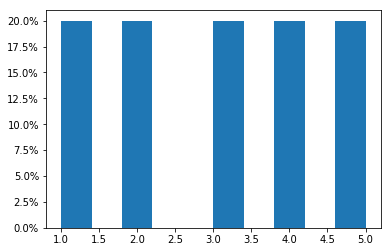

In [24]:
uniformed_review = df
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
plt.hist(uniformed_review["review_stars"],weights=np.ones(len(uniformed_review["review_stars"])) / len(uniformed_review["review_stars"]))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

# 5 CATEGORY Sentiment prediction

```
# This is formatted as code
```



In [25]:
uniformed_review.dtypes

business_id      object
name             object
address          object
city             object
state            object
postal_code      object
latitude        float64
longitude       float64
stars           float64
review_count      int64
is_open           int64
attributes       object
categories       object
hours            object
user_id          object
review_stars      int64
text             object
date             object
dtype: object

In [26]:
len(uniformed_review)

50000

In [27]:
trunc = 10000

## sampling neutral review:
#reviews1 = uniformed_review[uniformed_review["review_stars"] == 1]
#reviews1 = reviews1.sample(n=trunc)

## sampling negative review:
#reviews2 = uniformed_review[uniformed_review["review_stars"] == 2]
#reviews2 = reviews2.sample(n=trunc)


## sampling positive review:
#reviews3 = uniformed_review[uniformed_review["review_stars"] == 3]
#reviews3 = reviews3.sample(n=trunc)

## sampling positive review:
#reviews4 = uniformed_review[uniformed_review["review_stars"] == 4]
#reviews4 = reviews4.sample(n=trunc)

## sampling positive review:
#reviews5 = uniformed_review[uniformed_review["review_stars"] == 5]
#reviews5 = reviews5.sample(n=trunc)

#uniformed_review = reviews1.append([reviews2, reviews3,reviews4,reviews5])
#uniformed_review.shape

In [28]:
# Encoded the target column
lb=LabelEncoder()
uniformed_review['sentiment'] = lb.fit_transform(uniformed_review['review_stars'].values)

tokenizer = Tokenizer(num_words=500, split=' ') 
tokenizer.fit_on_texts(uniformed_review['text'].values)
X = tokenizer.texts_to_sequences(uniformed_review['text'].values)
X = pad_sequences(X)

#Splitting the data into training and testing
y=pd.get_dummies(uniformed_review['review_stars'])
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [29]:
model = Sequential()
model.add(Embedding(500, 120, input_length = X.shape[1]))
#model.add(SpatialDropout1D(0.4))
model.add(LSTM(128))
model.add(Dense(5,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 794, 120)          60000     
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               127488    
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 645       
Total params: 188,133
Trainable params: 188,133
Non-trainable params: 0
_________________________________________________________________
None


In [30]:
import time
start = time.time()



batch_size = 32
X_train1 = X_train[batch_size:]
y_train1 = y_train[batch_size:]
X_valid = X_train[:batch_size]
y_valid = y_train[:batch_size]


history = model.fit(X_train1, y_train1, validation_data=(X_valid,y_valid), epochs = 10, batch_size=batch_size, verbose = 'auto')

end = time.time()
hours, rem = divmod(end-start, 3600)
minutes, seconds = divmod(rem, 60)


print("Execution time: "+"{:0>2}:{:0>2}:{:05.2f}".format(int(hours),int(minutes),seconds))

Epoch 1/10
1093/1093 [==============================] - 1049s 957ms/step - loss: 1.2177 - accuracy: 0.4678 - val_loss: 1.0245 - val_accuracy: 0.5625
Epoch 2/10
1093/1093 [==============================] - 1051s 961ms/step - loss: 1.0905 - accuracy: 0.5317 - val_loss: 1.0791 - val_accuracy: 0.4375
Epoch 3/10
1093/1093 [==============================] - 903s 825ms/step - loss: 1.0695 - accuracy: 0.5382 - val_loss: 1.0562 - val_accuracy: 0.5625
Epoch 4/10
1093/1093 [==============================] - 904s 827ms/step - loss: 1.0207 - accuracy: 0.5610 - val_loss: 0.8322 - val_accuracy: 0.5938
Epoch 5/10
1093/1093 [==============================] - 887s 811ms/step - loss: 0.9812 - accuracy: 0.5778 - val_loss: 0.8851 - val_accuracy: 0.6250
Epoch 6/10
1093/1093 [==============================] - 902s 826ms/step - loss: 0.9606 - accuracy: 0.5861 - val_loss: 0.9124 - val_accuracy: 0.5625
Epoch 7/10
1093/1093 [==============================] - 888s 812ms/step - loss: 0.9299 - accuracy: 0.5999 - va

In [31]:
# evaluate the keras model
_, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 57.07


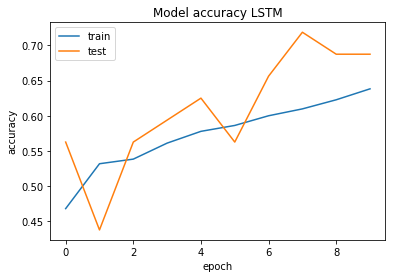

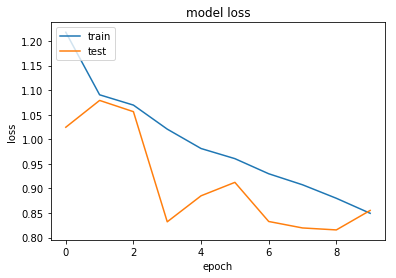

In [32]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy LSTM')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [33]:
#

# 3 category sentiment prediction

## Creating 3 categories for the ratings



In [34]:
# create a list of our conditions
conditions = [
    (uniformed_review['review_stars'] <= 2),
    (uniformed_review['review_stars'] == 3),
    (uniformed_review['review_stars'] > 3)
    ]

# create a list of the values we want to assign for each condition
values = [0, 1,2]

# create a new column and use np.select to assign values to it using our lists as arguments
uniformed_review['three_star'] = np.select(conditions, values)

# display updated DataFrame
#uniformed_review.head()

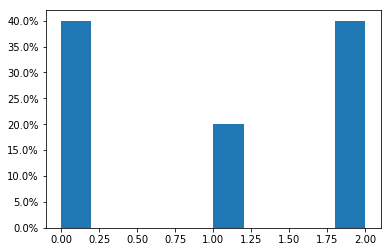

In [35]:
plt.hist(uniformed_review["three_star"],weights=np.ones(len(uniformed_review["three_star"])) / len(uniformed_review["three_star"]))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

In [36]:
reviews_smallest = uniformed_review[uniformed_review["three_star"] == 1]

## sampling negative review:
reviews_neg = uniformed_review[uniformed_review["three_star"] == 0]
reviews_neg = reviews_neg.sample(n=reviews_smallest.shape[0])


## sampling positive review:
reviews_pos = uniformed_review[uniformed_review["three_star"] == 2]
reviews_pos = reviews_pos.sample(n=reviews_smallest.shape[0])

uniformed_review = reviews_smallest.append([reviews_neg, reviews_pos])
uniformed_review.shape

(30000, 20)

# Truncating to 500 sample to speed up the process

In [37]:
# trunc = 1000

# ## sampling neutral review:
# reviews_utral = uniformed_review[uniformed_review["three_star"] == 1]
# reviews_utral = reviews_utral.sample(n=trunc)

# ## sampling negative review:
# reviews_neg = uniformed_review[uniformed_review["three_star"] == 0]
# reviews_neg = reviews_neg.sample(n=trunc)


# ## sampling positive review:
# reviews_pos = uniformed_review[uniformed_review["three_star"] == 2]
# reviews_pos = reviews_pos.sample(n=trunc)

# uniformed_review = reviews_utral.append([reviews_neg, reviews_pos])
# uniformed_review.shape

In [38]:
# Encoded the target column
lb=LabelEncoder()
uniformed_review['sentiment'] = lb.fit_transform(uniformed_review['three_star'].values)

tokenizer = Tokenizer(num_words=500, split=' ') 
tokenizer.fit_on_texts(uniformed_review['text'].values)
X = tokenizer.texts_to_sequences(uniformed_review['text'].values)
X = pad_sequences(X)

#Splitting the data into training and testing
y=pd.get_dummies(uniformed_review['three_star'])
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [39]:
# model = Sequential()
# model.add(Embedding(500, 120, input_length = X.shape[1]))
# #model.add(SpatialDropout1D(0.4))
# model.add(LSTM(128)
# model.add(Dense(3,activation='softmax'))
# model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
# print(model.summary())
          
          
model = Sequential()
model.add(Embedding(500, 120, input_length = X.shape[1]))
#model.add(SpatialDropout1D(0.4))
model.add(LSTM(128))
model.add(Dense(3,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 788, 120)          60000     
_________________________________________________________________
lstm_3 (LSTM)                (None, 128)               127488    
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 387       
Total params: 187,875
Trainable params: 187,875
Non-trainable params: 0
_________________________________________________________________
None


In [40]:
import time
start = time.time()



batch_size = 32
X_train1 = X_train[batch_size:]
y_train1 = y_train[batch_size:]
X_valid = X_train[:batch_size]
y_valid = y_train[:batch_size]


history = model.fit(X_train1, y_train1, validation_data=(X_valid,y_valid), epochs = 10, batch_size=batch_size, verbose = 'auto')

end = time.time()
hours, rem = divmod(end-start, 3600)
minutes, seconds = divmod(rem, 60)


print("Execution time: "+"{:0>2}:{:0>2}:{:05.2f}".format(int(hours),int(minutes),seconds))

Epoch 1/10
656/656 [==============================] - 542s 823ms/step - loss: 0.8288 - accuracy: 0.6113 - val_loss: 0.6648 - val_accuracy: 0.7812
Epoch 2/10
656/656 [==============================] - 537s 819ms/step - loss: 0.7235 - accuracy: 0.6813 - val_loss: 0.6912 - val_accuracy: 0.7188
Epoch 3/10
656/656 [==============================] - 529s 806ms/step - loss: 0.6906 - accuracy: 0.6961 - val_loss: 0.6089 - val_accuracy: 0.7500
Epoch 4/10
656/656 [==============================] - 540s 824ms/step - loss: 0.6682 - accuracy: 0.7043 - val_loss: 0.6500 - val_accuracy: 0.6875
Epoch 5/10
656/656 [==============================] - 533s 812ms/step - loss: 0.6470 - accuracy: 0.7183 - val_loss: 0.6038 - val_accuracy: 0.7188
Epoch 6/10
656/656 [==============================] - 536s 817ms/step - loss: 0.6223 - accuracy: 0.7304 - val_loss: 0.6916 - val_accuracy: 0.7188
Epoch 7/10
656/656 [==============================] - 540s 823ms/step - loss: 0.6101 - accuracy: 0.7366 - val_loss: 0.5017 -

In [41]:
# evaluate the keras model
_, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 69.32


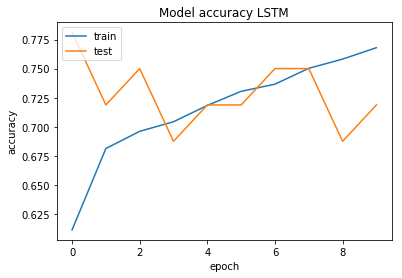

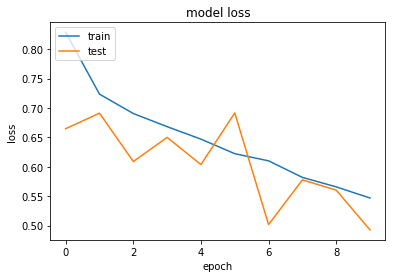

In [42]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy LSTM')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Two category sentiment prediciton

In [43]:
uniformed_review = pd.read_csv(dwn_url)
uniformed_review.shape

(50000, 18)

In [44]:
# create a list of our conditions
conditions = [
    (uniformed_review['review_stars'] <= 2),
    (uniformed_review['review_stars'] == 3),
    (uniformed_review['review_stars'] > 3)
    ]

# create a list of the values we want to assign for each condition
values = [0,-1,1]

# create a new column and use np.select to assign values to it using our lists as arguments
uniformed_review['two_star'] = np.select(conditions, values)


uniformed_review = uniformed_review[uniformed_review.two_star != -1]

# display updated DataFrame
uniformed_review.shape

(40000, 19)

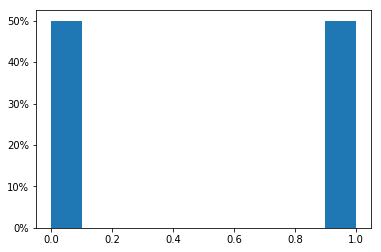

In [45]:
plt.hist(uniformed_review["two_star"],weights=np.ones(len(uniformed_review["two_star"])) / len(uniformed_review["two_star"]))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

## Truncating 1000 sample

In [46]:
# trunc = 1000

# ## sampling negative review:
# reviews_neg = uniformed_review[uniformed_review["two_star"] == 0]
# reviews_neg = reviews_neg.sample(n=trunc)


# ## sampling positive review:
# reviews_pos = uniformed_review[uniformed_review["two_star"] == 1]
# reviews_pos = reviews_pos.sample(n=trunc)

# uniformed_review = reviews_neg.append([reviews_pos])
# uniformed_review.shape

In [47]:
# Encoded the target column
lb=LabelEncoder()
uniformed_review['sentiment'] = lb.fit_transform(uniformed_review['two_star'].values)

tokenizer = Tokenizer(num_words=500, split=' ') 
tokenizer.fit_on_texts(uniformed_review['text'].values)
X = tokenizer.texts_to_sequences(uniformed_review['text'].values)
X = pad_sequences(X)

#Splitting the data into training and testing
y=pd.get_dummies(uniformed_review['two_star'])
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [48]:
model = Sequential()
model.add(Embedding(500, 120, input_length = X.shape[1]))
#model.add(SpatialDropout1D(0.4))
model.add(LSTM(128))
model.add(Dense(2,activation='sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics = ['accuracy'])
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 797, 120)          60000     
_________________________________________________________________
lstm_4 (LSTM)                (None, 128)               127488    
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 258       
Total params: 187,746
Trainable params: 187,746
Non-trainable params: 0
_________________________________________________________________
None


In [49]:
import time
start = time.time()



batch_size = 32
X_train1 = X_train[batch_size:]
y_train1 = y_train[batch_size:]
X_valid = X_train[:batch_size]
y_valid = y_train[:batch_size]


history = model.fit(X_train1, y_train1, validation_data=(X_valid,y_valid), epochs = 10, batch_size=batch_size, verbose = 'auto')

end = time.time()
hours, rem = divmod(end-start, 3600)
minutes, seconds = divmod(rem, 60)


print("Execution time: "+"{:0>2}:{:0>2}:{:05.2f}".format(int(hours),int(minutes),seconds))

Epoch 1/10
874/874 [==============================] - 522s 595ms/step - loss: 0.3591 - accuracy: 0.8439 - val_loss: 0.3450 - val_accuracy: 0.8438
Epoch 2/10
874/874 [==============================] - 377s 431ms/step - loss: 0.2977 - accuracy: 0.8802 - val_loss: 0.3049 - val_accuracy: 0.8750
Epoch 3/10
874/874 [==============================] - 376s 430ms/step - loss: 0.2563 - accuracy: 0.8953 - val_loss: 0.2609 - val_accuracy: 0.9062
Epoch 4/10
874/874 [==============================] - 376s 430ms/step - loss: 0.2286 - accuracy: 0.9079 - val_loss: 0.2494 - val_accuracy: 0.8750
Epoch 5/10
874/874 [==============================] - 376s 430ms/step - loss: 0.2074 - accuracy: 0.9185 - val_loss: 0.2639 - val_accuracy: 0.7812
Epoch 6/10
874/874 [==============================] - 376s 430ms/step - loss: 0.1955 - accuracy: 0.9236 - val_loss: 0.2614 - val_accuracy: 0.8438
Epoch 7/10
874/874 [==============================] - 376s 430ms/step - loss: 0.2070 - accuracy: 0.9185 - val_loss: 0.2221 -

In [50]:
# evaluate the keras model
_, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 90.73


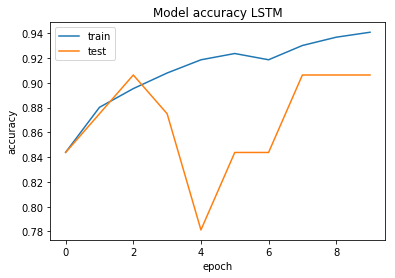

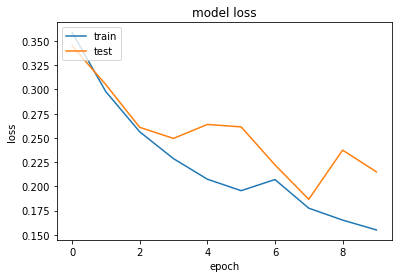

In [51]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy LSTM')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()